## 딥러닝 기말고사

* 시험시간: 09:00~10:20분까지<br><br>
* 파일이름 작성방법: 딥러닝_기말고사_학번_성명.ipynb<br>
\- 주의사항: jupyternotebook file을 실행해본 후 upload하세요
* 답안지 제출 
   www.webhard.co.kr<br>
   ID: lindsey<br>
   PW: start<br>
   답안제출 Folder: 올리기전용/딥러닝(학부2학년)/딥러닝_기말고사답안제출_폴더"에 답안제출<br><br>
* 빈칸에 프로그램을 작성한 후 실행결과를 제출
* 시험 시간 이후에 upload된 file은 인정하지 않습니다

In [8]:
import platform

print(f"Python version: {platform.python_version()}")
assert platform.python_version_tuple() >= ("3", "6")

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Setup plots
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

import tensorflow as tf

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Layer, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.metrics import binary_accuracy
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

from keras.layers import Conv2D, MaxPooling2D


Python version: 3.9.7
TensorFlow version: 2.10.0
Keras version: 2.10.0


### Dataset 설명
1. $28 \times 28$ MNIST 손글씨 image 7만장을 다음과 같이 loading하였다
1. 7만장중 6만장은 학습에 사용하고 1만장은 test에 사용함

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
train_images.shape

(60000, 28, 28, 1)

#### [문제 1] 위의 MNIST dataset을 이용하여 다음 Network Architecture를 가지는 epoch = 3으로 Autoencoder를 학습하고 Testdataset의 처음 5개 data에 대해 Original data와 Autoencoder로 생성한 5개 data의 image를 출력하시오

Neural Network | Layer | 설명
:----|:----|:----
Encoder | Convolution layer 1 | $3 \times3$ filter 16장, activation: ReLU, $2 \times 2$ Maxpooling
Encoder | Convolution layer 2 | $3 \times3$ filter  8장, activation: ReLU, $2 \times 2$ Maxpooling
Encoder | Convolution layer 3 | $3 \times3$ filter  2장, activation: ReLU, $2 \times 2$ Maxpooling
Decoder | Convolution layer 1 | $3 \times3$ filter  2장, activation: ReLU, $2 \times 2$ Maxpooling
Decoder | Convolution layer 2 | $3 \times3$ filter  8장, activation: ReLU, $2 \times 2$ Maxpooling
Decoder | Convolution layer 3 | $3 \times3$ filter 16장, activation: ReLU, $2 \times 2$ Maxpooling

In [14]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import layers

In [15]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(2, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(2, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [16]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=3,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/3
469/469 [==============================] - 30s 60ms/step - loss: 0.2647 - val_loss: 0.1849
Epoch 2/3
469/469 [==============================] - 33s 70ms/step - loss: 0.1744 - val_loss: 0.1646
Epoch 3/3
469/469 [==============================] - 58s 125ms/step - loss: 0.1604 - val_loss: 0.1558


313/313 [==============================] - 3s 9ms/step


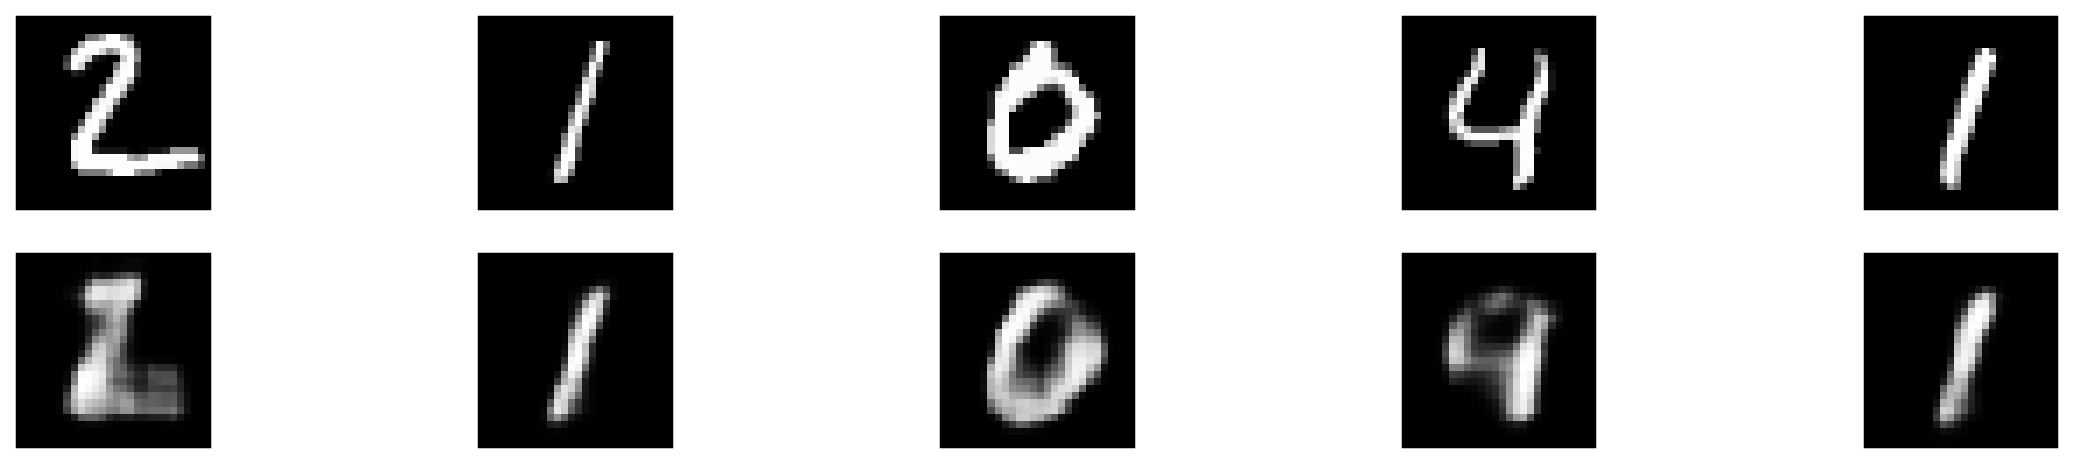

In [17]:
decoded_imgs = autoencoder.predict(x_test)

n = 5
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### [문제 2] MNIST dataset에서 다음과 같은 각 image에 noise를 추가하였다. Noise를 제거하기 위한 Autoencoder를 실행시키고 Testdataset의 처음 5개 data에 대해 Original data와 Auto Encoder로 생성한 5개 data의 image를 출력하시오. 단, Autoencoder의 Architecture는 문제 1과 같다.

In [3]:
(x_train, _), (x_test, _) = datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

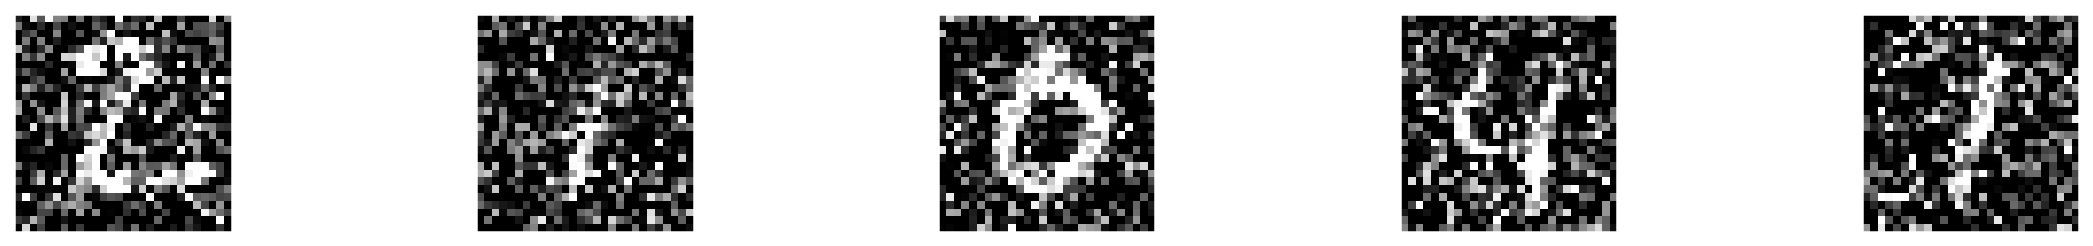

In [4]:
n = 5
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### [문제 3] 다음과 같은 data sequence $x$가 있을 때 주어진 data sequence의 label data $y$는 다음과 같다<br>

x = array([[1,2,3], [2,3,4], [3,4,5],  [4,5,6],   [5,6,7],
           [6,7,8], [7,8,9], [8,9,10], [9,10,11], [10,11,12],
           [20,30,40], [30,40,50], [40,50,60]])<br>
           
y =  array([5,6,7,8,9,10,11,12,13,14,60,70,80])

다음과 같은 조건에서 Simple RNN을 사용하여 $x_{new}=[25,35,45]$에 대한 다음 숫자를 예측하시오

- simple RNN layer: 5개
- 1개 Dense layer의 node 수: 10
- output node 수: 1개
- epoch=100<br>
- Activation function: ReLU
- Optimizer: Adam


In [2]:
from tensorflow.keras.layers import SimpleRNN

In [3]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, LSTM
 
x = np.array([[1,2,3], [2,3,4], [3,4,5], [4,5,6],
              [5,6,7], [6,7,8], [7,8,9], [8,9,10], 
              [9,10,11], [10,11,12], [20,30,40], [30,40,50],
              [40,50,60]])

y = np.array([5,6,7,8,9,10,11,12,13,14,60,70,80])

print(x.shape) # (13,3)
print(y.shape) # (13,)
x = x.reshape((x.shape[0], x.shape[1], 1))
print(x.shape) # (13,3,1)
 
model = Sequential()
model.add(SimpleRNN(5, activation = 'relu', input_shape=(3,1)))
model.add(Dense(10))
model.add(Dense(1))
 
model.compile(optimizer='adam', loss='mse')
 
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=100, mode='auto')
# loss값을 모니터해서 과적합이 생기면 100번 더 돌고 끊음
# mode=auto loss면 최저값이100번정도 반복되면 정지, acc면 최고값이 100번정도 반복되면 정지
# mode=min, mode=max
model.fit(x, y, epochs=100, batch_size=1, verbose=2, callbacks=[early_stopping])
 
x_input = array([25,35,45]) # predict용
x_input = x_input.reshape((1,3,1))
 
yhat = model.predict(x_input)
print(yhat)

(13, 3)
(13,)
(13, 3, 1)
Epoch 1/100
13/13 - 3s - loss: 18.6262 - 3s/epoch - 208ms/step
Epoch 2/100
13/13 - 0s - loss: 12.8372 - 36ms/epoch - 3ms/step
Epoch 3/100
13/13 - 0s - loss: 11.5100 - 39ms/epoch - 3ms/step
Epoch 4/100
13/13 - 0s - loss: 11.8594 - 41ms/epoch - 3ms/step
Epoch 5/100
13/13 - 0s - loss: 11.0550 - 37ms/epoch - 3ms/step
Epoch 6/100
13/13 - 0s - loss: 11.6939 - 40ms/epoch - 3ms/step
Epoch 7/100
13/13 - 0s - loss: 10.7826 - 43ms/epoch - 3ms/step
Epoch 8/100
13/13 - 0s - loss: 11.0590 - 38ms/epoch - 3ms/step
Epoch 9/100
13/13 - 0s - loss: 10.3682 - 40ms/epoch - 3ms/step
Epoch 10/100
13/13 - 0s - loss: 11.2578 - 37ms/epoch - 3ms/step
Epoch 11/100
13/13 - 0s - loss: 10.3693 - 37ms/epoch - 3ms/step
Epoch 12/100
13/13 - 0s - loss: 10.1558 - 39ms/epoch - 3ms/step
Epoch 13/100
13/13 - 0s - loss: 10.5185 - 35ms/epoch - 3ms/step
Epoch 14/100
13/13 - 0s - loss: 10.8077 - 37ms/epoch - 3ms/step
Epoch 15/100
13/13 - 0s - loss: 10.8413 - 37ms/epoch - 3ms/step
Epoch 16/100
13/13 - 0s 

#### [문제 4] $28 \times 28$ MNIST dataset에 대해 Variational Autoencoder를 실행하여 2차원 latent  manifold(숫자 image 공간)를 출력하시오

- input: $28 \times 28$ image
- 1개의 layer로 구성된 encoder: 32차원
- Latent layer: 2차원
- 1개의 layer로 구성된 decoder: 32차원
- 모든 layer의 activation function: ReLU
- epoch수; 50
- batch size: 128

In [5]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import layers

In [6]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [7]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [12]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='relu')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [13]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
batch_size = 128

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=50,
        batch_size=128,
        validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 6s 10ms/step - loss: 465.6180 - val_loss: 435.7033
Epoch 2/50
469/469 [==============================] - 4s 9ms/step - loss: 406.3786 - val_loss: 380.5855
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 379.3786 - val_loss: 377.0782
Epoch 4/50
469/469 [==============================] - 4s 9ms/step - loss: 374.4167 - val_loss: 369.3994
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 367.8492 - val_loss: 368.5387
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 366.2520 - val_loss: 366.0136
Epoch 7/50
469/469 [==============================] - 4s 9ms/step - loss: 367.3517 - val_loss: 366.6843
Epoch 8/50
469/469 [==============================] - 4s 9ms/step - loss: 366.1056 - val_loss: 366.2496
Epoch 9/50
469/469 [==============================] - 4s 9ms/step - loss: 365.3152 - val_loss: 364.8532
Epoch 10/50
469/469 [==============================] - 4s 9ms/s

79/79 [==============================] - 0s 3ms/step


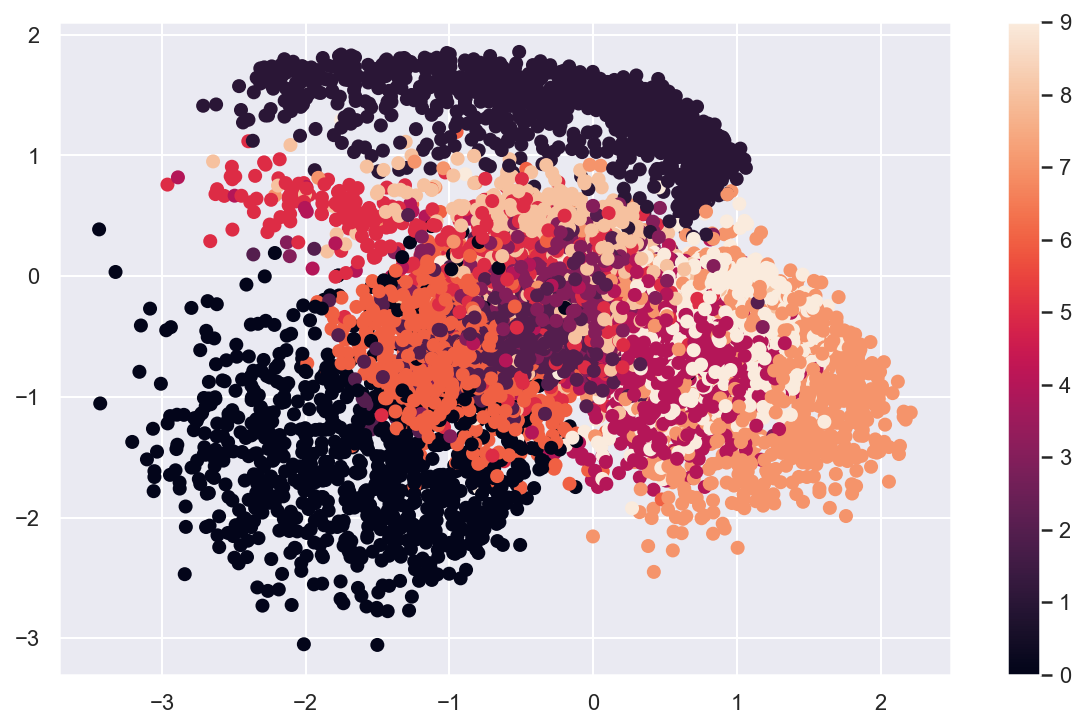

In [15]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)[0]
plt.figure(figsize=(10, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 46ms/step


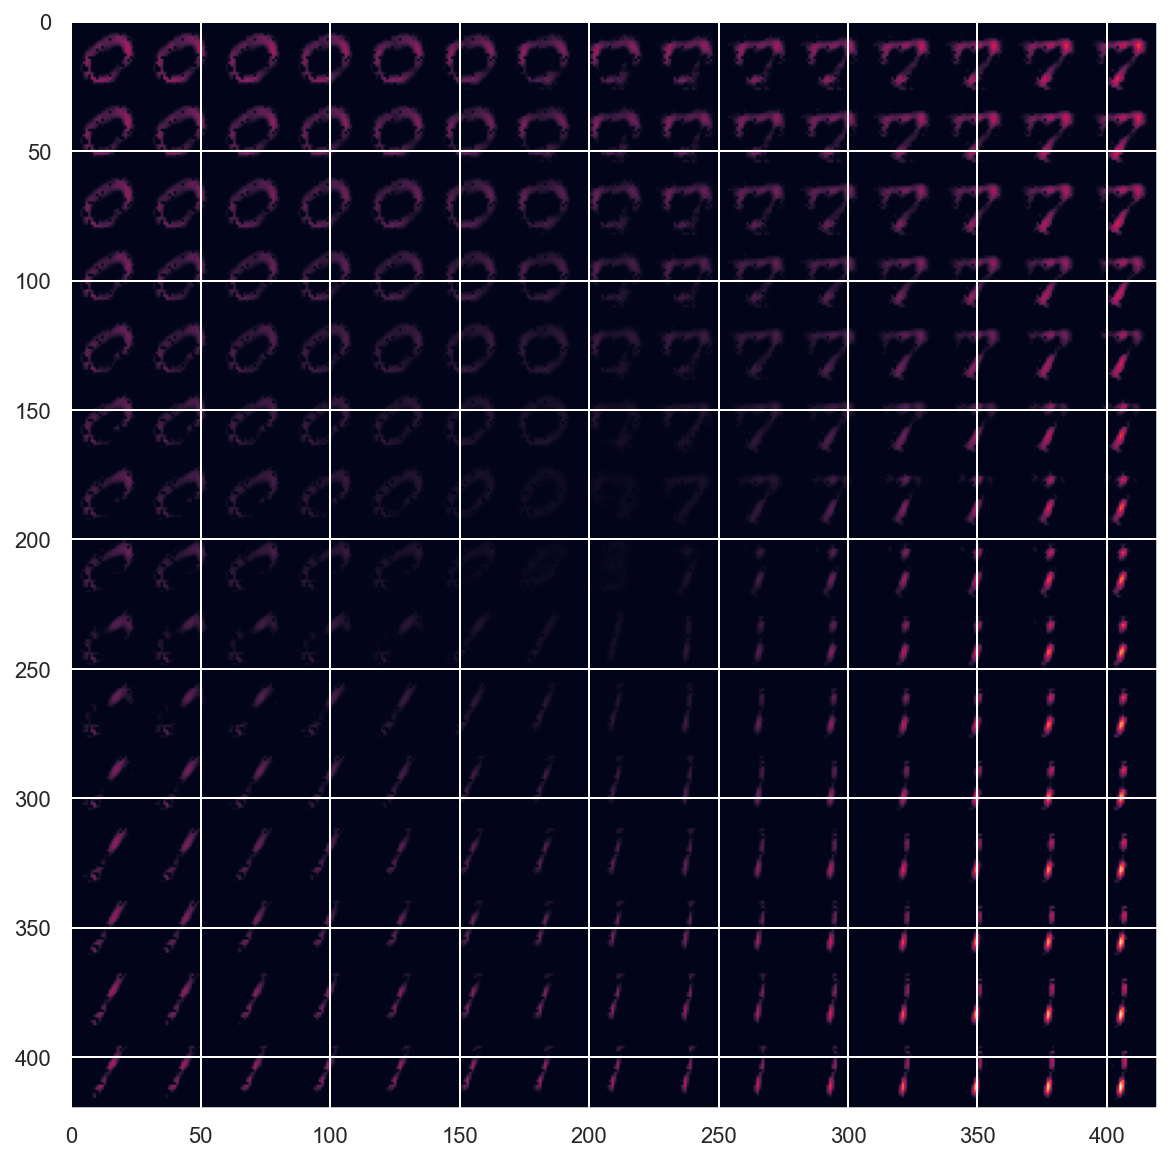

In [16]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

#### [문제 5] 문제 4에서 출력 결과에는 0~9까지의 모든 숫자가 나타나지 않는 이유는 무엇인가 간단히 서술하시오

#### 비선형적인 차원감소를 수행하고 이를 통해 원래 고차원의 데이터를 더 낮은 차원에서 표현하고 싶기에 일부 데이터의 손실이 발생하여 모든 숫자가 표시되지 않았다.